## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [3]:
# Start solution here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('heart.csv')
df.isnull().sum().sum()

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Variable Description:


*   age: Age of the patient
*   sex: Sex of the patient
*   cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
*   trtbps: Resting blood pressure (in mm Hg) (**130+ = high**)
*   chol: Cholestoral in mg/dl fetched via BMI sensor (**240+ = high**)
*   fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False
*   restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
*   thalachh: Maximum heart rate achieved
*   oldpeak: Previous peak
*   slp: Slope
*   caa: Number of major vessels
*   thall: Thalium Stress Test result, (0-3)
*   exng: Exercise induced angina, 1 = Yes, 0 = No
*   output: 0 = less chance of heart attack, 1 = more chance of heart attack

In [5]:
#relabeling some of the more confusing labels for visual purposes
df1 = df.copy()
df1['sex'] = df1['sex'].map({0:'female',1:'male'})
df1['cp'] = df1['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df1['restecg'] = df1['restecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'showing probable or definite left ventricular hypertrophy'})
df1['output'] = df1['output'].map({0:'less chance',1:'more chance'})

#adding columns for identifying high cholestrol and high blood pressure
df1["High_BP"] = df1['trtbps']>=130
df1["High_Chol"] = df1['chol']>=240

#fix order
cols_to_order = ['High_BP', 'High_Chol']
new_columns = cols_to_order + (df1.columns.drop(cols_to_order).tolist())
df1 = df1[new_columns]

df1.head()

,High_BP,High_Chol,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,True,False,63,male,asymptomatic,145,233,1,normal,150,0,2.3,0,0,1,more chance
1,True,True,37,male,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,0,0,2,more chance
2,True,False,41,female,atypical angina,130,204,0,normal,172,0,1.4,2,0,2,more chance
3,False,False,56,male,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,2,0,2,more chance
4,False,True,57,female,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,2,0,2,more chance


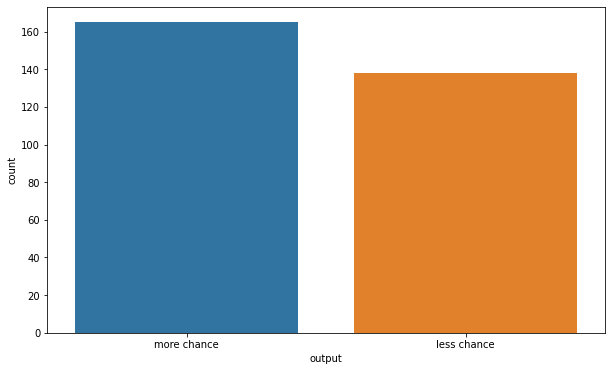

In [30]:
plt.figure(figsize = (10, 6))
sb.countplot(data = df1, x = 'output')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

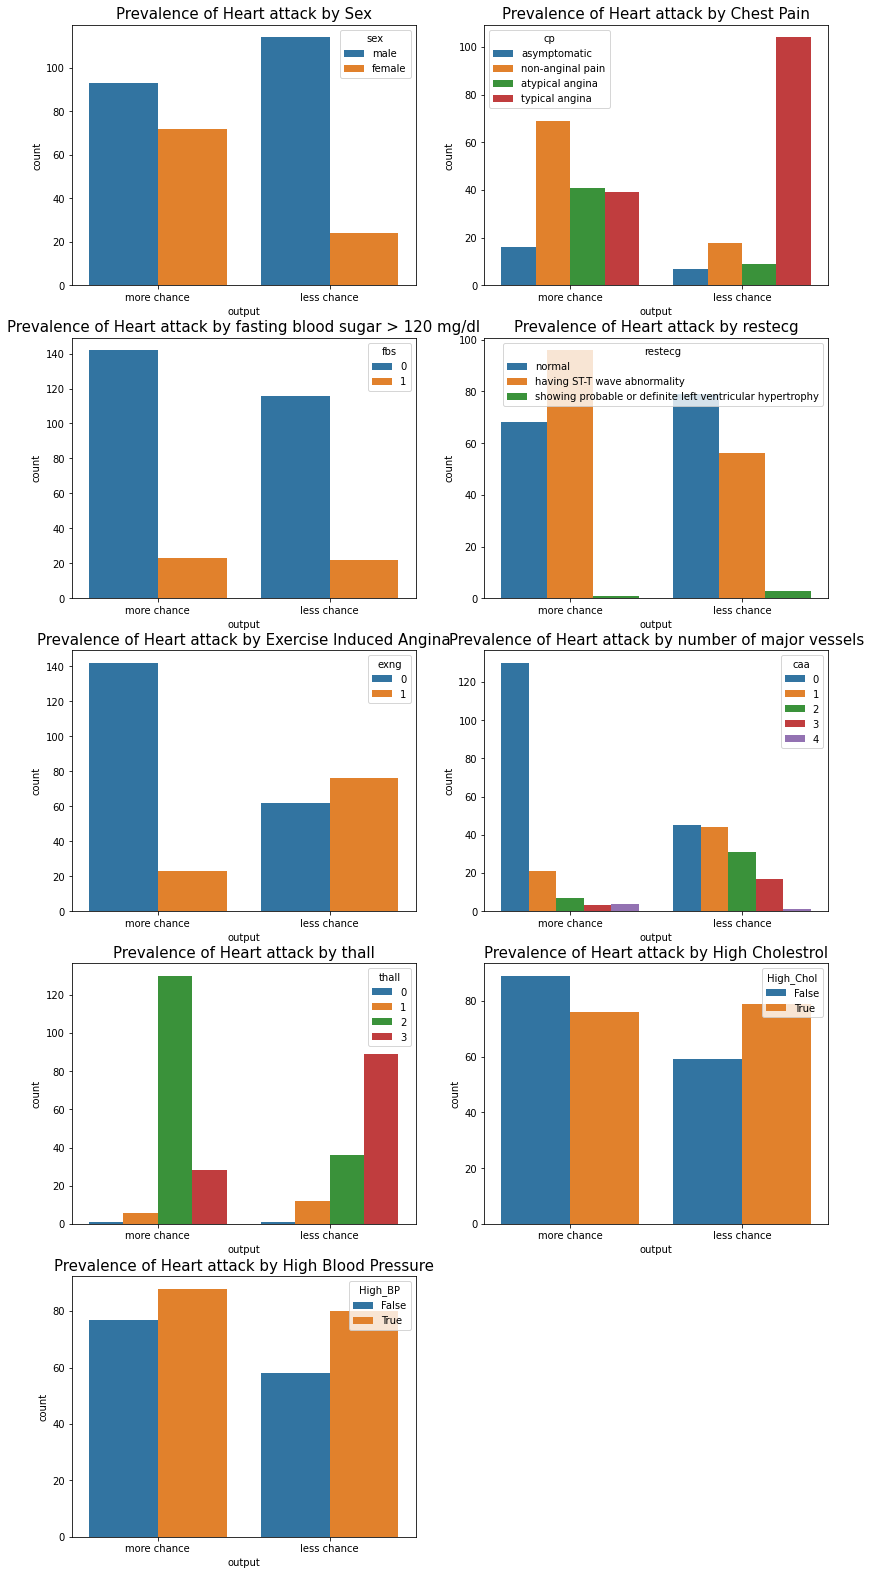

In [21]:
#basic visualization
plt.figure(figsize=(15,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.2)

plt.subplot(5,2,1)
plt.title('Prevalence of Heart attack by Sex',fontsize=15)
sb.countplot(df1['output'], hue=df1['sex'])

plt.subplot(5,2,2)
plt.title('Prevalence of Heart attack by Chest Pain',fontsize=15)
sb.countplot(df1['output'], hue=df1['cp'])

plt.subplot(5,2,3)
plt.title('Prevalence of Heart attack by fasting blood sugar > 120 mg/dl',fontsize=15)
sb.countplot(df1['output'],hue=df1['fbs'])

plt.subplot(5,2,4)
plt.title('Prevalence of Heart attack by restecg',fontsize=15)
sb.countplot(df1['output'],hue = df1['restecg'])

plt.subplot(5,2,5)
plt.title('Prevalence of Heart attack by Exercise Induced Angina',fontsize=15)
sb.countplot(df1['output'],hue=df1['exng'])

plt.subplot(5,2,6)
plt.title('Prevalence of Heart attack by number of major vessels',fontsize=15)
sb.countplot(df1['output'],hue=df1['caa'])

plt.subplot(5,2,7)
plt.title('Prevalence of Heart attack by thall',fontsize=15)
sb.countplot(df1['output'],hue=df1['thall'])

plt.subplot(5,2,8)
plt.title('Prevalence of Heart attack by High Cholestrol',fontsize=15)
sb.countplot(df1['output'],hue=df1['High_Chol'])

plt.subplot(5,2,9)
plt.title('Prevalence of Heart attack by High Blood Pressure',fontsize=15)
sb.countplot(df1['output'],hue=df1['High_BP'])



In [ ]:
- sex: guys more
- non-aginal 
- fasting blood sugar: no effect
- restecg: st-t wave abnormality
- execersied induced: little effect
- blood vessels: 0 the most
- thall: 2
- high cholestrol: not really
- hbp: yes but slightly

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[33 11]
 [ 4 43]]


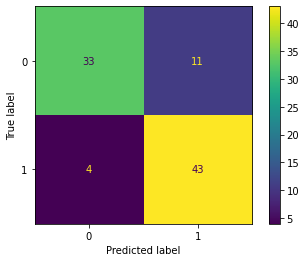

Accuracy = 0.8351648351648352


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#logistic regression model: 82% accuracy
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_predictions = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

matrix = metrics.confusion_matrix(y_test, y_predictions)
print(matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

print('Accuracy =',metrics.accuracy_score(y_test, y_predictions))


[[43  1]
 [ 3 44]]


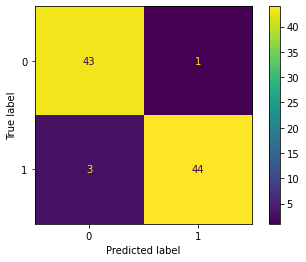

Testing Accuracy = 0.9560439560439561
Training Accuracy = 0.9622641509433962
cp
caa
chol
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.94      0.96        47

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



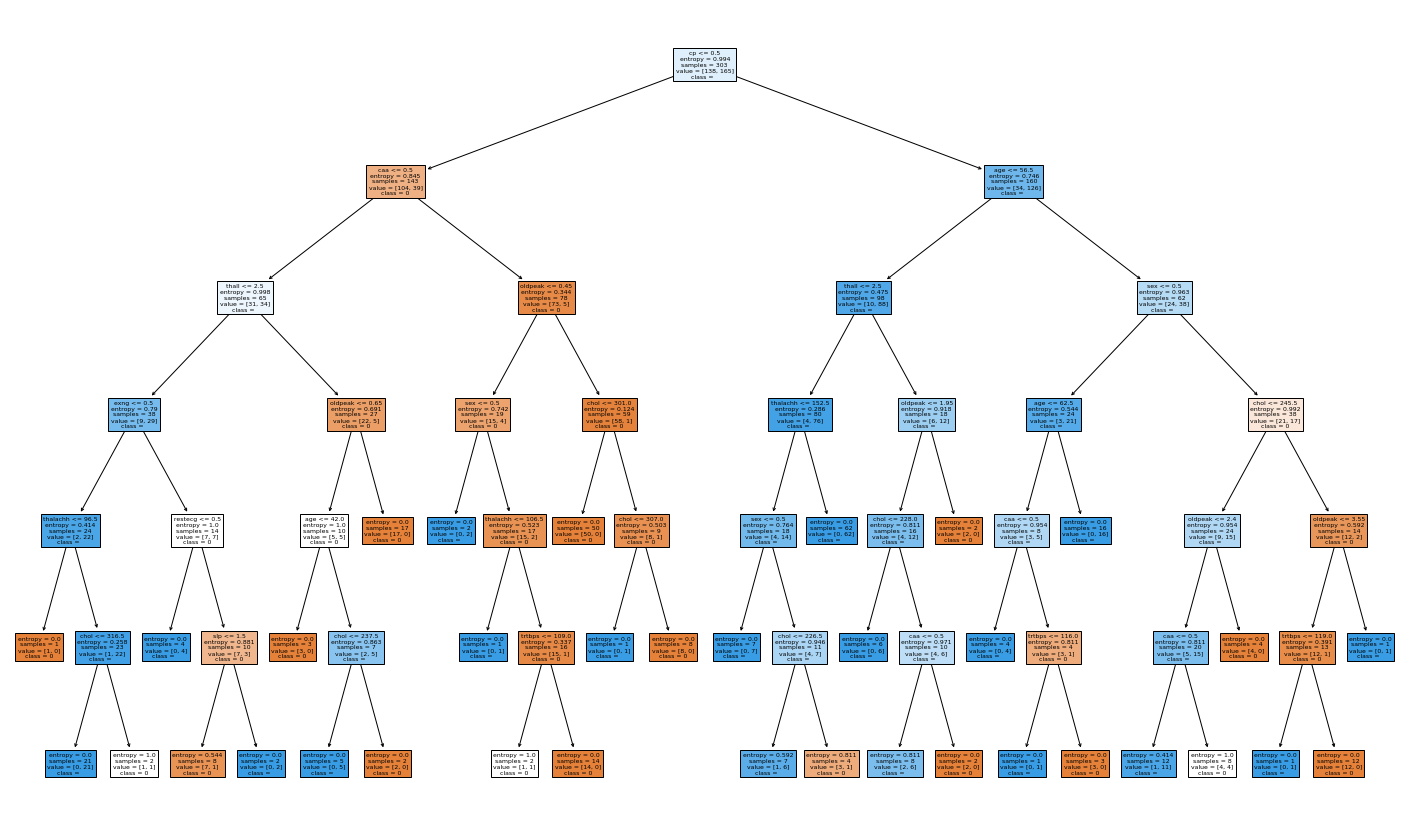

In [24]:
#decision tree model - 95%
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X = df.drop("output", axis=1)
y = df["output"]

X = pd.get_dummies(X)
X.head()

ctree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state = 2020)
ctree.fit(X, y)

y_predictions = ctree.predict(X_test)
y_pred_train = ctree.predict(X_train)

cf = metrics.confusion_matrix(y_test, y_predictions)
print(cf)
metrics.plot_confusion_matrix(ctree, X_test, y_test)
plt.show()

print('Testing Accuracy =', metrics.accuracy_score(y_test, y_predictions))
print('Training Accuracy =', metrics.accuracy_score(y_train, y_pred_train))

#top 3 most important: cp, caa, chol
importance = ctree.feature_importances_

new_dict = {}
for i,v in enumerate(importance):
    new_dict[i] = v
sorted_tuples = sorted(new_dict.items(), key=lambda item: item[1], reverse=True)
top3 = sorted_tuples[:3]
for i in top3:
    print(X.columns[int(i[0])])

print(metrics.classification_report(y_test, y_predictions))


#show classification tree
plt.figure(figsize=(25,15))
fn = X.columns
cn = str(y)

tree.plot_tree(ctree, feature_names=fn, class_names=cn, filled=True)
plt.savefig('heartDT.png')
plt.show()

1. Limit the max depth of the trees
2. Set stricter stopping criterion on when to split a node further (e.g. min gain, number of samples etc.)
3. Hyper-parameter Tuning the model and plot for train and cross validation
4. If you are using a Decision Tree as base model you can use an ensemble like a Random Forrest


In [25]:
#two hyperparameters for training. They are: maximum depth of the tree and minimum size of a leaf
ctree = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf= 10, random_state = 2020)
ctree.fit(X, y)

y_predictions = ctree.predict(X_test)

print('Accuracy =', metrics.accuracy_score(y_test, y_predictions))

Accuracy = 0.8461538461538461


In [19]:
# Generic Bagging model - 81%
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(n_estimators=10, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8131868131868132


In [33]:
# Random Forest model - 80%
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=2020)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
ac_rf = accuracy_score(y_test, predict_rf)

print(' Accuracy = ', ac_rf)

 Accuracy =  0.8351648351648352


In [38]:
# AdaBoost Classification - 80%
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth = 5)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=2020, learning_rate=.05)
ada_boost.fit(X_train, y_train)

res = round(accuracy_score(y_test, ada_boost.predict(X_test)),4)

print('MODEL Accuracy:\t {}'.format(res))

MODEL Accuracy:	 0.7473
